## I. Inicio




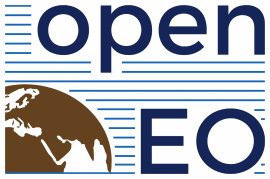

Hello All!


This tutorial will provide you with a gentle introduction to the basic functionalities and processes of openEO.
In order to have access to the cloud-computing capabilities, you must register on the Copernicus Data Space Ecosystem. Here is the [link](https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/auth?client_id=cdse-public&response_type=code&scope=openid&redirect_uri=https%3A//dataspace.copernicus.eu/account/confirmed/340).


First we start by installing the openEO API package

In [ ]:
!pip install openeo --quiet
!pip install rasterio --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 68.9 MB/s eta 0:00:00


Now we import the package. Also, we need to authenticate the workflow with the credentials we have just registered with.

In [ ]:
import openeo
from openeo.rest.job import RESTJob
from openeo.rest.conversions import timeseries_json_to_pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rasterio

# First, we connect to the back-end and authenticate.
connection = openeo.connect("openeo.dataspace.copernicus.eu")
connection.authenticate_oidc()


In [ ]:
# Get detailed metadata of a certain collection
connection.describe_collection("SENTINEL2_L2A")

{'assets': {'thumbnail': {'href': 'https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2022/07/tallinn_estonia/24383281-1-eng-GB/Tallinn_Estonia_pillars.jpg',
   'roles': ['thumbnail'],
   'title': 'Sentinel 2 L2A',
   'type': 'image/png'}},
 'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['B01',
    'B02',
    'B03',
    'B04',
    'B05',
    'B06',
    'B07',
    'B08',
    'B8A',
    'B09',
    'B11',
    'B12',
    'WVP',
    'AOT',
    'SCL',
    'sunAzimuthAngles',
    'sunZenithAngles',
    'viewAzimuthMean',
    'viewZenithMean']},
  't': {'extent': ['2015-07-04T00:00:00Z', None], 'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-180, 180],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [-56, 83],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'}},
 'description': 'SENTINEL-2 is a wide-swath, high-resolution, multi-spectral imaging mission, supporting Copernicus Land Monitoring studies, including the monitoring of vegetation, soil and water cover, as well as observation of inland waterways and coastal areas. The SENTINEL-2 Multispectral Instrument (MSI) samples 13 spectral bands: four bands at 10 metres, six bands at 20 metres and three bands at 60 metres spatial resolution.\n The level 2A data is atmospherically corrected using Sen2Cor.',
 'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
  'temporal': {'interval': [['2015-07-04T00:00:00Z', None]]}},
 'id': 'SENTINEL2_L2A',
 'keywords': ['COPERNICUS',
  'ESA',
  'Orthoimagery',
  'Sentinel-2',
  'MSI',
  'Level-2A',
  'Radiometry',
  'Plant Resource',
  'TOC'],
 'license': 'proprietary',
 'links': [{'href': 'https://sentinels.copernicus.eu/documents/247904/690755/Sentinel_Data_Legal_Notice',
   'rel': 'license',
   'type': 'application/pdf'},
  {'href': 'https://documentation.dataspace.copernicus.eu/Data/SentinelMissions/Sentinel2.html#sentinel-2-level-2a-top-of-canopy-toc',
   'rel': 'alternate',
   'type': 'application/html'},
  {'href': 'https://dataspace.copernicus.eu/browser/?zoom=11&lat=45.36638&lng=12.49832&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2F28b654e7-8912-4e59-9e58-85b58d768b3a&datasetId=S2

Now that we are connected, we can initialize our datacube object with the area of interest and the time range of interest using Sentinel 2 data.
We want to define our area if interest. We can do it by passing a bbox parameter in the following way.

*   You can define your bounding box: https://geojson.io/



In [ ]:
bbox = [
    5.05,
    51.20,
    5.15,
    51.24
  ]
temporal_extent = ["2020-07-21", "2020-07-22"]

Note, that all processes and satellite data collections can be inspected on the [openEO web editor](https://openeo.dataspace.copernicus.eu/) which is a GUI.

openEO works with "Datacubes", which represent multi-dimensional arrays with metadata. These can be considered as if they were netCDF or xarray datasets. openEO datacubes facilitate the processing of the satellite data you wish to investigate. Let's see an example with Sentinel-2 Level 2-A product.

In [ ]:
sentinel2_cube = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent={"west": bbox[0], "south": bbox[1], "east": bbox[2], "north": bbox[3]},
    temporal_extent = temporal_extent,
    bands=["B02", "B04", "B08","SCL"],
    max_cloud_cover=85,
)
sentinel2_cube

## II-a. Data processing - Cloud masking

In [ ]:
cube = connection.load_collection("SENTINEL2_L2A",
                           spatial_extent={"west": bbox[0], "south": bbox[1], "east": bbox[2], "north": bbox[3]},
                           temporal_extent=temporal_extent,
                           bands=["B04", "B03", "B02","B08","SCL"]
                           )
cube.download("basic-clouded.tiff")

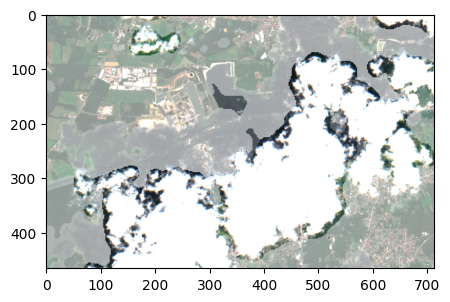

In [ ]:
DEFAULT_FIGSIZE = (5, 4)

def show_tiff(filename:str, figsize=DEFAULT_FIGSIZE, vmin=None, vmax=None, rescale_percentile=97, add_colorbar=False):
    """Small helper to load a geotiff and visualize it"""
    with rasterio.open(filename) as ds:
        data = ds.read()

    fig, ax = plt.subplots(figsize=figsize)

    if len(data.shape) == 3:
        if data.max() > 500:
            p = np.percentile(data, rescale_percentile, axis=[1,2])
            data = data / p[:, None, None]
            data = np.clip(data, 0, 1)
        data = np.moveaxis(data, 0, 2)

    im = ax.imshow(data, vmin=vmin, vmax=vmax)
    if add_colorbar:
        fig.colorbar(im, ax=ax, fraction=0.05)
show_tiff("basic-clouded.tiff", rescale_percentile=70)

We clearly need to:


1.   Identify clouds
2.   Eliminate/mask them

We will use the Scene Classification map band from Sentinel 2

[Classes](https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/scene-classification/)


In [ ]:
classification = cube.band("SCL")

We will create a mask that contains both vegetated and non-vegetated areas. This will eliminate clouds, water, shadows, snows.

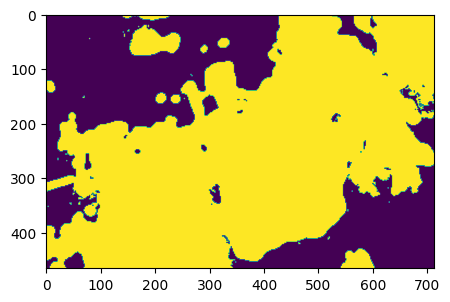

In [ ]:
mask = ~ ((classification == 4) | (classification == 5))
mask.download("mask-orig.tiff", format="GTiff")
show_tiff("mask-orig.tiff")

Now that we only have the areas we want to work with, we can process what we want, e.g. NDVI.

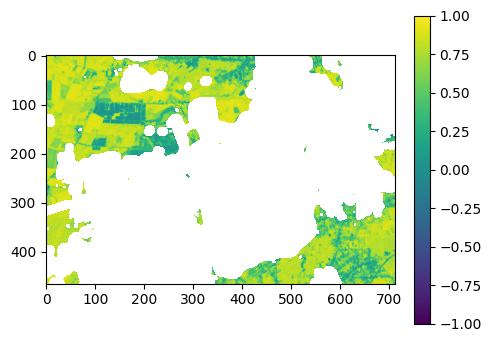

In [ ]:
red = cube.band("B04")
nir = cube.band("B08")
ndvi = (nir - red) / (nir + red)

masked_ndvi = ndvi.mask(mask)
masked_ndvi.download("ndvi-masked.tiff", format="GTIFF")
show_tiff("ndvi-masked.tiff", vmin=-1, vmax=1, add_colorbar=True)

# II-b Data processing - Time series

In [ ]:
!pip install shapely
import shapely
import json

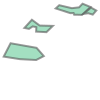

In [ ]:
fields_geojson = '{"type": "GeometryCollection", "geometries": [{"type": "Polygon", "coordinates": [[[5.055945487931457, 51.222709834076504], [5.064972484168688, 51.221122565090525], [5.064972484168688, 51.221122565090525], [5.067474954083448, 51.218249806779134], [5.064827929485983, 51.21689628072789], [5.05917785594747, 51.217191909908095], [5.053553857094518, 51.21807492332223], [5.055945487931457, 51.222709834076504]]]}, {"type": "Polygon", "coordinates": [[[5.063345886679116, 51.23087606640057], [5.06604742694687, 51.22886710731809], [5.070627820472246, 51.22874440121892], [5.068403609708207, 51.22657208381529], [5.064823257492447, 51.22676051738515], [5.064892324615199, 51.2283032878514], [5.063641745941974, 51.2285757299238], [5.062340811262595, 51.227722351687945], [5.06076005158084, 51.228042312276536], [5.063345886679116, 51.23087606640057]]]}, {"type": "Polygon", "coordinates": [[[5.07163184674986, 51.23481147556147], [5.076706025697324, 51.23317590781036], [5.077828303041866, 51.233226237184724], [5.078024733866917, 51.23263978271262], [5.080771081607657, 51.23259097170763], [5.083734842574312, 51.23530464074437], [5.080957826735458, 51.23646091560258], [5.079752631651647, 51.23519531038643], [5.077238400183506, 51.23490534677628], [5.072856439300575, 51.23593546777778], [5.07163184674986, 51.23481147556147]]]}, {"type": "Polygon", "coordinates": [[[5.083897244679042, 51.23510639883143], [5.081302408741335, 51.232922477780846], [5.082963802194108, 51.233146058575876], [5.084497702305552, 51.232672717580655], [5.085732850338428, 51.2340852086282], [5.083897244679042, 51.23510639883143]]]}]}'
fields = shapely.geometry.shape(json.loads(fields_geojson))
fields

We load a data cube and calculate the NDVI, but we now use a larger time window covering of a couple of months.

In [ ]:
dates = ("2020-06-01", "2020-10-01")

cube = connection.load_collection("SENTINEL2_L2A", temporal_extent=dates, bands=["B04", "B08"])

red = cube.band("B04")
nir = cube.band("B08")
ndvi = (nir - red) / (nir + red)

In [ ]:
timeseries = ndvi.aggregate_spatial(geometries=fields, reducer="mean")

In [ ]:
timeseries.download("timeseries.json", format="JSON")

We use the *timeseries_json_to_pandas* helper function, provided with the openEO package

In [ ]:
with open("timeseries.json") as f:
    ts = timeseries_json_to_pandas(json.load(f)).dropna()
ts.index = pd.to_datetime(ts.index)
ts.head()

polygon,0,1,2,3
date,,,,
2020-06-01 00:00:00+00:00,0.748243,0.498644,0.652281,0.489483
2020-06-04 00:00:00+00:00,0.017617,0.014716,0.014953,0.015706
2020-06-06 00:00:00+00:00,0.774712,0.501601,0.713629,0.386638
2020-06-09 00:00:00+00:00,0.073320,0.075100,0.068040,0.055843
2020-06-11 00:00:00+00:00,0.022542,0.024322,0.024203,0.020721


In [ ]:
def plot_timeseries(filename):
    """Helper to plot the timeseries directly from JSON file"""
    with open(filename) as f:
        ts = timeseries_json_to_pandas(json.load(f)).dropna()
    ts.index = pd.to_datetime(ts.index)
    fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
    ts.plot(marker='o', ax=ax)
    ax.set_title("Average NDVI"); ax.set_ylabel("NDVI");ax.set_ylim(0, 1)
    ax.legend(title="parcel id", loc="lower left", ncol=2)

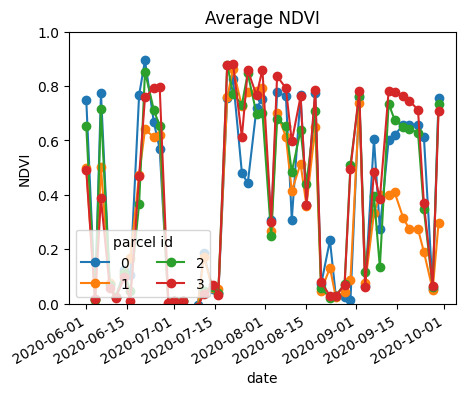

In [ ]:
plot_timeseries("timeseries.json")

# II-c. Data processing - Enhanced Vegetation Index

From this data cube, we can now select the individual bands with the DataCube.band() method and rescale the digital number values to physical reflectances:


In [ ]:
blue = sentinel2_cube.band("B02") * 0.0001
red = sentinel2_cube.band("B04") * 0.0001
nir = sentinel2_cube.band("B08") * 0.0001

 We now want to compute the enhanced vegetation index and can do that directly with these band variables:

* The enhanced vegetation index (EVI) is an 'optimized' vegetation index designed to enhance the vegetation signal with improved sensitivity in high biomass regions and improved vegetation monitoring through a de-coupling of the canopy background signal and a reduction in atmosphere influences. (Huete et al., 2002)*

In [ ]:
evi_cube = 2.5 * (nir - red) / (nir + 6.0 * red - 7.5 * blue + 1.0)

The SCL band allows the detection of clouds, snow and cloud shadows.
Now we can use the compact “band math” feature again to build a binary mask with a simple comparison operation:
Select the "SCL" band from the data cube

In [ ]:
scl_band = sentinel2_cube.band("SCL")
# Build mask to mask out everything but class 4 (vegetation)
mask = (scl_band != 4)

Before we can apply this mask to the EVI cube we have to resample it, as the “SCL” layer has a “ground sample distance” of 20 meter, while it is 10 meter for the “B02”, “B04” and “B08” bands. We can easily do the resampling by referring directly to the EVI cube.

In [ ]:
mask_resampled = mask.resample_cube_spatial(evi_cube)

# Apply the mask to the `evi_cube`
evi_cube_masked = evi_cube.mask(mask_resampled)

# Because GeoTIFF does not support a temporal dimension, we first eliminate it by taking the temporal maximum value for each pixel:
evi_composite = evi_cube_masked.max_time()

# Now we can download this to a local file:
evi_composite.download("evi-composite.tiff")

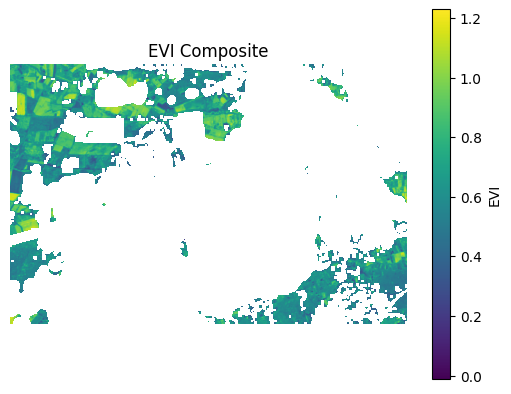

In [ ]:


tiff_file = "/content/evi-composite.tiff"
with rasterio.open(tiff_file) as src:
    I = src.read(1)  # Read the first band

plt.imshow(I, cmap='viridis')
plt.colorbar(label="EVI")
plt.title("EVI Composite")
plt.axis('off')
plt.show()

Szünet?
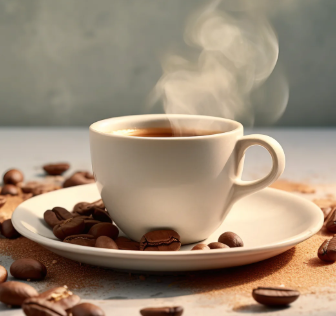

# III-a User Defined Function (UDFs)

If your use case can not be accomplished with the default processes of openEO, you can define a user defined function. Therefore, you can create a Python function that will be executed at the back-end and functions as a process in your process graph.

Results can be pre-computed by creating a batch job. Results can be downloaded. Batch jobs are typically time consuming and user interaction is not possible although log files are generated for them.

In [ ]:
cube = connection.load_collection(
    "SENTINEL2_L2A",
    bands=["B04", "B03", "B02"],
    temporal_extent=("2022-05-01", "2022-05-30"),
    spatial_extent={
        "west": 5.05,
        "south": 51.21,
        "east": 5.1,
        "north": 51.23,
        "crs": "EPSG:4326",
    },
    max_cloud_cover=50,
)

cube = cube.reduce_dimension(dimension="t", reducer="max")
cube

In [ ]:
rescaled_cube = cube.apply(process=udf)

In [ ]:
udf = openeo.UDF(
    """
from openeo.udf import XarrayDataCube

def apply_datacube(cube: XarrayDataCube, context: dict) -> XarrayDataCube:
    array = cube.get_array()
    array.values = 0.0001 * array.values
    return cube
"""
)

rescaled_cube.download("rescale_s2.tiff")

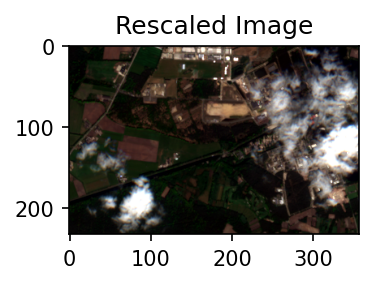

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

img = rasterio.open("rescale_s2.tiff").read()


def normalizeimg(data):
    data = data.astype(float)
    for i in range(data.shape[2]):
        p2, p98 = np.percentile(data[:, :, i], (2, 98))
        data[:, :, i] = exposure.rescale_intensity(data[:, :, i], in_range=(p2, p98))
    return data

fig, ax = plt.subplots(figsize=(6, 2), dpi=150)
ax.imshow(normalizeimg(np.moveaxis(img, 0, -1)))

ax.set_title("Rescaled Image")

# Adjusting the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Machine learning - practical usages:


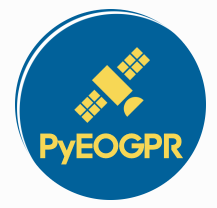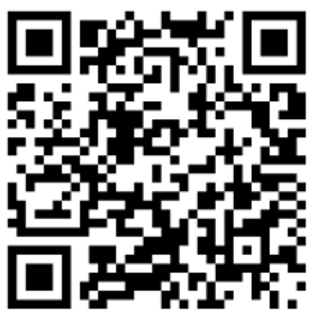

In [ ]:
!pip install pyeogpr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.5/281.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.2 MB/s eta 0:00:00


In [ ]:

from pyeogpr import Datacube

bounding_box = [
           -0.305543150556133,
           39.29253033906926,
           -0.28169853763617425,
           39.303338211248104
         ]

time_window = ["2022-05-01", "2022-06-01"]

dc = Datacube(
    "SENTINEL2_L2A",
    "FVC",
    bounding_box,
    time_window,
    cloudmask=True
)

dc.construct_datacube("dekad")

dc.process_map(gapfill=False, fileformat="nc")

Authenticated using refresh token.



Default
0.0001
DataCube(<PGNode 'apply' at 0x7fb4e1167d30>)
Cloud masked, temporally composited datacube constructed: dekad by mean values.
gapfill-> False
self.own_model None
0:00:00 Job 'j-241128ff18394618b26085125c9c6504': send 'start'
0:00:13 Job 'j-241128ff18394618b26085125c9c6504': created (progress 0%)
0:00:18 Job 'j-241128ff18394618b26085125c9c6504': created (progress 0%)
0:00:25 Job 'j-241128ff18394618b26085125c9c6504': created (progress 0%)
0:00:33 Job 'j-241128ff18394618b26085125c9c6504': created (progress 0%)
0:00:43 Job 'j-241128ff18394618b26085125c9c6504': created (progress 0%)
0:00:56 Job 'j-241128ff18394618b26085125c9c6504': created (progress 0%)
0:01:12 Job 'j-241128ff18394618b26085125c9c6504': running (progress N/A)
0:01:31 Job 'j-241128ff18394618b26085125c9c6504': running (progress N/A)
0:01:55 Job 'j-241128ff18394618b26085125c9c6504': running (progress N/A)
0:02:25 Job 'j-241128ff18394618b26085125c9c6504': finished (progress 100